In [1]:
# Hotel booking project in which I create a ML model where I predict whether guests will cancel their reservation or not

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
## dataset

In [4]:
df = pd.read_csv(r'D:\p1_hotel\hotel_bookings.csv')

In [5]:
type(df)

pandas.core.frame.DataFrame

In [6]:
## data cleaning

In [7]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [8]:
df.drop(['agent', 'company'], axis = 1, inplace = True)

In [9]:
### finding mode and replacing all country missing values with mode

df['country'].value_counts().index[0]

'PRT'

In [10]:
df['country'].fillna(df['country'].value_counts().index[0], inplace = True)

In [11]:
df.fillna(0, inplace = True)

In [12]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [13]:
### removing irrelevant data

filter1 = (df['children'] == 0) & (df['adults'] == 0) & (df['babies'] == 0)

In [14]:
df[filter1]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,...,I,1,No Deposit,0,Transient-Party,0.00,0,0,Check-Out,10/6/2015
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,...,I,0,No Deposit,0,Transient,0.00,0,0,Check-Out,10/12/2015
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,...,C,0,No Deposit,0,Transient-Party,0.00,0,0,Check-Out,11/23/2015
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,...,A,1,No Deposit,122,Transient-Party,0.00,0,0,Check-Out,1/4/2016
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,...,C,1,No Deposit,122,Transient-Party,0.00,0,0,Check-Out,1/5/2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,...,A,1,No Deposit,0,Transient,100.80,0,0,Check-Out,6/30/2017
115091,City Hotel,0,1,2017,June,26,30,0,1,0,...,K,0,No Deposit,0,Transient,0.00,1,1,Check-Out,7/1/2017
116251,City Hotel,0,44,2017,July,28,15,1,1,0,...,K,2,No Deposit,0,Transient,73.80,0,0,Check-Out,7/17/2017
116534,City Hotel,0,2,2017,July,28,15,2,5,0,...,K,1,No Deposit,0,Transient-Party,22.86,0,1,Check-Out,7/22/2017


In [15]:
data = df[~filter1]

In [16]:
data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.00,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.00,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.00,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.00,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out,7/3/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,A,0,No Deposit,0,Transient,96.14,0,0,Check-Out,9/6/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,E,0,No Deposit,0,Transient,225.43,0,2,Check-Out,9/7/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,D,0,No Deposit,0,Transient,157.71,0,4,Check-Out,9/7/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,A,0,No Deposit,0,Transient,104.40,0,0,Check-Out,9/7/2017


In [17]:
## analysing data

In [18]:
### Q1: Where do the guests come from?

In [19]:
country_wise_data = data[data['is_canceled'] == 0]['country'].value_counts().reset_index()
country_wise_data.columns = ['country', 'no_of_guests']
country_wise_data

,country,no_of_guests
0,PRT,21398
1,GBR,9668
2,FRA,8468
3,ESP,6383
4,DEU,6067
...,...,...
160,BHR,1
161,DJI,1
162,MLI,1
163,NPL,1


In [20]:
# !pip install plotly
# !pip install chart_studio

In [21]:
import plotly
import chart_studio.plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected = True)
import plotly.express as px

In [22]:
map_guest = px.choropleth(country_wise_data, 
                locations = country_wise_data['country'],
                color = country_wise_data['no_of_guests'],
                hover_name = country_wise_data['country'],
                title = 'Home country of guests')

In [23]:
map_guest.show()

In [24]:
### Q2: How much do guests pay for a room per night?

In [25]:
data2 = data[data['is_canceled'] == 0]

In [26]:
data2.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

Text(0, 0.5, 'price(EUR)')

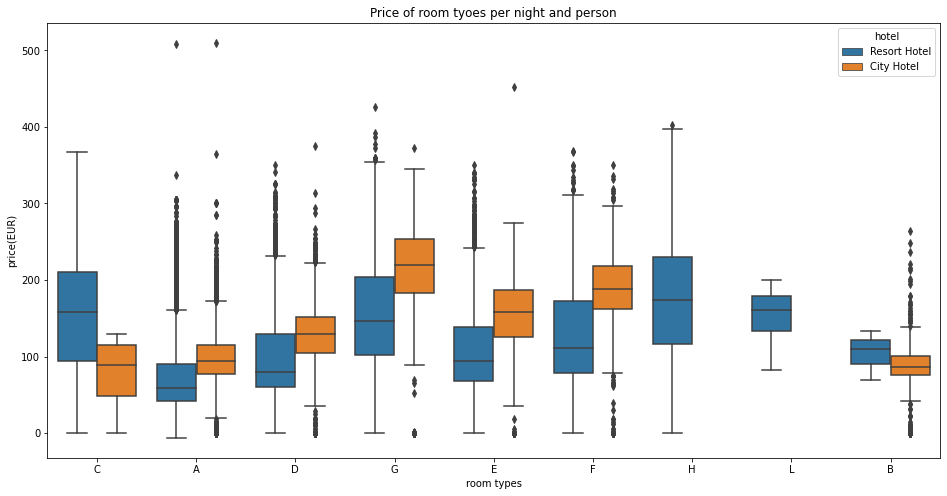

In [27]:
plt.figure(figsize = (16,8))
sns.boxplot(x = 'reserved_room_type', y = 'adr', hue = 'hotel', data = data2)
plt.title('Price of room tyoes per night and person')
plt.xlabel('room types')
plt.ylabel('price(EUR)')

In [28]:
### Q3: Which are the most busy month?

In [29]:
data['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [30]:
data_resort = data[(data['hotel'] == 'Resort Hotel') & (data['is_canceled'] == 0)]
data_city = data[(data['hotel'] == 'City Hotel') & (data['is_canceled'] == 0)]

In [31]:
data_resort.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,7/2/2015


In [32]:
rush_resort = data_resort['arrival_date_month'].value_counts().reset_index()
rush_resort.columns = ['month', 'no_of_guests']
rush_resort

,month,no_of_guests
0,August,3257
1,July,3137
2,October,2575
3,March,2571
4,April,2550
5,May,2535
6,February,2308
7,September,2102
8,June,2037
9,December,2014


In [33]:
rush_city = data_city['arrival_date_month'].value_counts().reset_index()
rush_city.columns = ['month', 'no_of_guests']
rush_city

,month,no_of_guests
0,August,5367
1,July,4770
2,May,4568
3,June,4358
4,October,4326
5,September,4283
6,March,4049
7,April,4010
8,February,3051
9,November,2676


In [34]:
final_rush = rush_resort.merge(rush_city, on = 'month')

In [35]:
# !pip install sorted_months_weekdays
# !pip install sort_dataframeby_monthorweek

In [36]:
import sort_dataframeby_monthorweek as sd

In [37]:
final_rush = sd.Sort_Dataframeby_Month(final_rush, 'month')

In [38]:
final_rush.columns = ['month', 'no_of_guests_resor', 'no_of_guests_city']
final_rush

,month,no_of_guests_resor,no_of_guests_city
0,January,1866,2249
1,February,2308,3051
2,March,2571,4049
3,April,2550,4010
4,May,2535,4568
5,June,2037,4358
6,July,3137,4770
7,August,3257,5367
8,September,2102,4283
9,October,2575,4326


In [39]:
px.line(data_frame = final_rush, x = 'month', y = ['no_of_guests_resor', 'no_of_guests_city'])

In [40]:
### Q4: Which month has highest average daily rate?

In [41]:
data = sd.Sort_Dataframeby_Month(data, 'arrival_date_month')

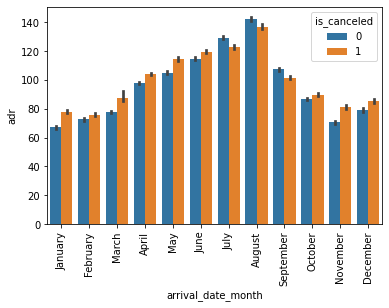

In [42]:
sns.barplot(x = 'arrival_date_month', y = 'adr', data = data, hue = 'is_canceled')
plt.xticks(rotation = 'vertical')
plt.show()

In [43]:
### Q5: Were bookings made only for weekdays or for weekends or for both?

In [44]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [45]:
pd.crosstab(index = data['stays_in_weekend_nights'], columns = data['stays_in_week_nights'])

stays_in_week_nights,0,1,2,3,4,5,6,7,8,9,...,24,25,26,30,32,33,34,40,42,50
stays_in_weekend_nights,,,,,,,,,,,,,,,,,,,,,
0,645,16436,17949,11557,4478,830,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4569,7325,8976,6150,2407,1188,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2358,6531,6745,4534,2658,8648,847,446,391,81,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,308,300,397,131,61,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,94,347,181,132,86,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
def week_function(row):
    feature1 = 'stays_in_weekend_nights'
    feature2 = 'stays_in_week_nights'
    
    if row[feature2] == 0 and row[feature1] > 0:
        return 'stay_just_weekend'
    
    elif row[feature2] > 0 and row[feature1] == 0:
        return 'stay_just_weekdays'
    
    elif row[feature2] > 0 and row[feature1] > 0:
        return 'stay_both_weekend_weekdays'
    
    else:
        return 'undefined_data'

In [47]:
data2['weekend_or_weekday'] = data2.apply(week_function, axis = 1)

C:\Users\Djuki\AppData\Local\Temp\ipykernel_16692\2986188129.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [48]:
data2.head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,weekend_or_weekday
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,0,Transient,0.0,0,0,Check-Out,7/1/2015,undefined_data
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,0,Transient,0.0,0,0,Check-Out,7/1/2015,undefined_data


In [49]:
data2['weekend_or_weekday'].value_counts()

stay_both_weekend_weekdays    37551
stay_just_weekdays            31788
stay_just_weekend              5050
undefined_data                  622
Name: weekend_or_weekday, dtype: int64

In [50]:
data2 = sd.Sort_Dataframeby_Month(data2, 'arrival_date_month')

In [51]:
data2.groupby(['arrival_date_month', 'weekend_or_weekday']).size()

arrival_date_month  weekend_or_weekday        
April               stay_both_weekend_weekdays    3627
                    stay_just_weekdays            2559
                    stay_just_weekend              344
                    undefined_data                  30
August              stay_both_weekend_weekdays    4929
                    stay_just_weekdays            3137
                    stay_just_weekend              509
                    undefined_data                  49
December            stay_both_weekend_weekdays    1901
                    stay_just_weekdays            2123
                    stay_just_weekend              298
                    undefined_data                  69
February            stay_both_weekend_weekdays    2438
                    stay_just_weekdays            2514
                    stay_just_weekend              360
                    undefined_data                  47
January             stay_both_weekend_weekdays    1550
                  

In [52]:
group_data = data2.groupby(['arrival_date_month', 'weekend_or_weekday']).size().unstack().reset_index()

In [53]:
sorted_data = sd.Sort_Dataframeby_Month(group_data, 'arrival_date_month')

In [54]:
sorted_data.set_index('arrival_date_month', inplace = True)

In [55]:
sorted_data

,stay_both_weekend_weekdays,stay_just_weekdays,stay_just_weekend,undefined_data
arrival_date_month,,,,
January,1550,2125,393,47
February,2438,2514,360,47
March,3151,3060,359,50
April,3627,2559,344,30
May,3442,3017,570,74
June,3241,2685,433,36
July,4570,2818,462,57
August,4929,3137,509,49
September,3192,2692,479,22


<AxesSubplot:xlabel='arrival_date_month'>

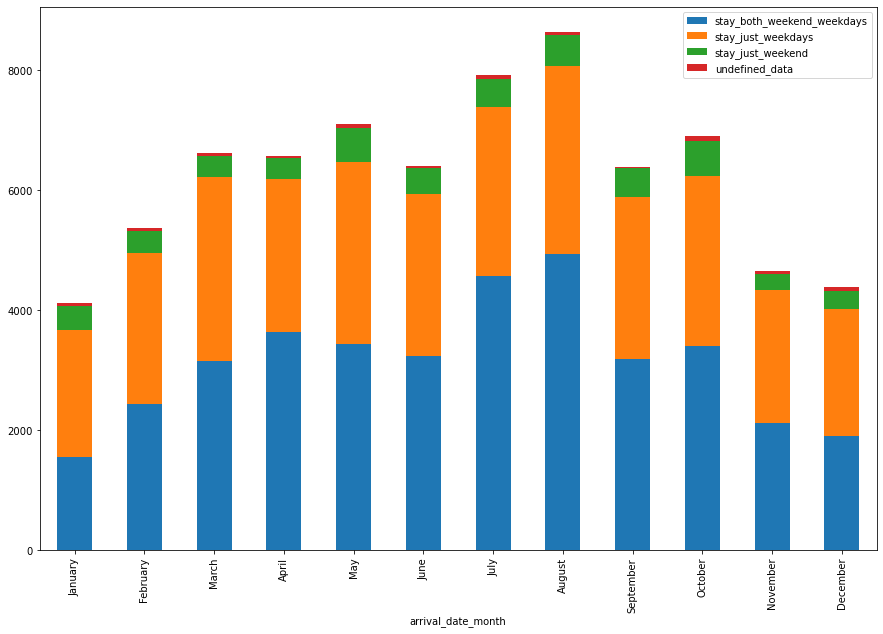

In [56]:
sorted_data.plot(kind = 'bar', stacked = True, figsize = (15,10))

In [57]:
## creating more features

In [58]:
def family(row) :
    if (row['adults'] > 0) & (row['children'] > 0 or row['babies'] > 0) :
        return 1
    else:
        return 0

In [59]:
data['is_family'] = data.apply(family, axis = 1)
data['is_family']

0         0
1         1
2         0
3         0
4         1
         ..
119205    1
119206    0
119207    0
119208    0
119209    0
Name: is_family, Length: 119210, dtype: int64

In [60]:
data['total_customers'] = data['adults'] + data['babies'] + data['children']

In [61]:
data['total_nights'] = data['stays_in_week_nights'] + data['stays_in_weekend_nights'] 

In [62]:
data.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,is_family,total_customers,total_nights
0,Resort Hotel,0,109,2016,January,1,1,0,1,2,...,0,Transient-Party,59.94,0,1,Check-Out,1/2/2016,0,2.0,1
1,Resort Hotel,0,109,2016,January,1,1,0,1,2,...,0,Transient-Party,116.10,1,1,Check-Out,1/2/2016,1,4.0,1
2,Resort Hotel,1,2,2016,January,1,1,0,1,2,...,0,Transient,89.00,0,1,No-Show,1/1/2016,0,2.0,1


In [63]:
data['deposit_type'].unique()

array(['No Deposit', 'Non Refund', 'Refundable'], dtype=object)

In [64]:
dict1 = {'No Deposit' : 0, 'Non Refund' : 1, 'Refundable' : 0}

In [65]:
data['deposit_given'] = data['deposit_type'].map(dict1)

In [66]:
data['deposit_given']

0         0
1         0
2         0
3         0
4         0
         ..
119205    0
119206    0
119207    0
119208    0
119209    0
Name: deposit_given, Length: 119210, dtype: int64

In [67]:
data.drop(columns = ['adults', 'children', 'babies', 'deposit_type'], axis = 1, inplace = True)

In [68]:
## feature encoding

In [69]:
data.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
days_in_waiting_list                int64
customer_type                      object
adr                               float64
required_car_parking_spaces         int64
total_of_special_requests         

In [70]:
cate_features = [col for col in data.columns if data[col].dtype =='object']

In [71]:
num_features = [col for col in data.columns if data[col].dtype != 'object']

In [72]:
cate_features

['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'customer_type',
 'reservation_status',
 'reservation_status_date']

In [73]:
num_features

['is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'is_family',
 'total_customers',
 'total_nights',
 'deposit_given']

In [74]:
data_cat = data[cate_features]

In [75]:
data.groupby(['hotel'])['is_canceled'].mean().to_dict()

{'City Hotel': 0.4178593534858457, 'Resort Hotel': 0.27767373336329815}

In [76]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [77]:
data_cat['cancellation'] = data['is_canceled']

In [78]:
data_cat.head()

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,reservation_status,reservation_status_date,cancellation
0,Resort Hotel,January,BB,RUS,Online TA,TA/TO,A,D,Transient-Party,Check-Out,1/2/2016,0
1,Resort Hotel,January,BB,RUS,Online TA,TA/TO,H,H,Transient-Party,Check-Out,1/2/2016,0
2,Resort Hotel,January,BB,PRT,Online TA,TA/TO,D,D,Transient,No-Show,1/1/2016,1
3,Resort Hotel,January,HB,ARG,Online TA,TA/TO,A,D,Transient,Check-Out,1/3/2016,0
4,Resort Hotel,January,BB,PRT,Online TA,TA/TO,G,G,Transient,Canceled,12/22/2015,1


In [79]:
cols = data_cat.columns

In [80]:
cols = cols[0:-1]
cols

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'customer_type', 'reservation_status', 'reservation_status_date'],
      dtype='object')

In [81]:
for col in cols:
    dict2 = data_cat.groupby([col])['cancellation'].mean().to_dict()
    data_cat[col] = data_cat[col].map(dict2)

In [82]:
## handling outliers

In [83]:
data[num_features]

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_family,total_customers,total_nights,deposit_given
0,0,109,2016,1,1,0,1,0,0,0,0,0,59.94,0,1,0,2.0,1,0
1,0,109,2016,1,1,0,1,0,0,0,0,0,116.10,1,1,1,4.0,1,0
2,1,2,2016,1,1,0,1,0,0,0,0,0,89.00,0,1,0,2.0,1,0
3,0,88,2016,1,1,0,2,0,0,0,0,0,73.46,0,2,0,2.0,2,0
4,1,20,2016,1,1,0,2,0,0,0,0,0,119.00,0,0,1,4.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119205,0,173,2016,53,26,3,8,0,0,0,4,0,117.82,0,1,1,3.0,11,0
119206,0,17,2016,53,30,2,5,0,0,0,0,0,90.34,0,1,0,2.0,7,0
119207,0,107,2016,53,31,2,5,0,0,0,0,0,103.57,0,0,0,2.0,7,0
119208,0,310,2016,53,27,2,10,0,0,0,2,0,68.57,0,2,0,2.0,12,0


In [84]:
dataframe = pd.concat([data_cat,data[num_features]], axis = 1)

In [85]:
dataframe.columns

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'customer_type', 'reservation_status', 'reservation_status_date',
       'cancellation', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'booking_changes', 'days_in_waiting_list', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests', 'is_family',
       'total_customers', 'total_nights', 'deposit_given'],
      dtype='object')

In [86]:
dataframe.drop(['cancellation'], axis = 1, inplace = True)

In [87]:
dataframe.head(3)

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,reservation_status,...,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_family,total_customers,total_nights,deposit_given
0,0.277674,0.305016,0.374106,0.379365,0.36759,0.410598,0.391567,0.251373,0.254504,0.0,...,0,0,0,59.94,0,1,0,2.0,1,0
1,0.277674,0.305016,0.374106,0.379365,0.36759,0.410598,0.407654,0.352528,0.254504,0.0,...,0,0,0,116.10,1,1,1,4.0,1,0
2,0.277674,0.305016,0.374106,0.562958,0.36759,0.410598,0.318108,0.251373,0.407864,1.0,...,0,0,0,89.00,0,1,0,2.0,1,0


<AxesSubplot:xlabel='lead_time', ylabel='Density'>

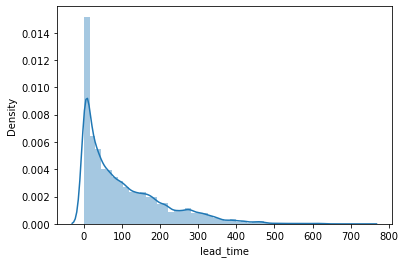

In [88]:
sns.distplot(dataframe['lead_time'])

In [89]:
def handle_outlier(col):
    dataframe[col] = np.log1p(dataframe[col])

In [90]:
handle_outlier('lead_time')

<AxesSubplot:xlabel='lead_time', ylabel='Density'>

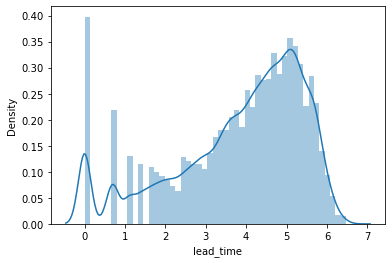

In [91]:
sns.distplot(dataframe['lead_time'])

<AxesSubplot:xlabel='adr', ylabel='Density'>

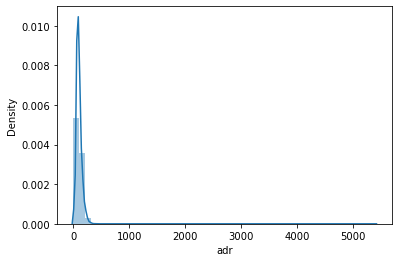

In [92]:
sns.distplot(dataframe['adr'])

In [93]:
dataframe[dataframe['adr'] < 0]

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,reservation_status,...,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_family,total_customers,total_nights,deposit_given
14989,0.277674,0.322277,0.374106,0.20231,0.611086,0.174868,0.391567,0.352528,0.254504,0.0,...,2,2,0,-6.38,0,0,0,2.0,10,0


In [94]:
handle_outlier('adr')

In [95]:
dataframe['adr'].isnull().sum()

1

<AxesSubplot:xlabel='adr', ylabel='Density'>

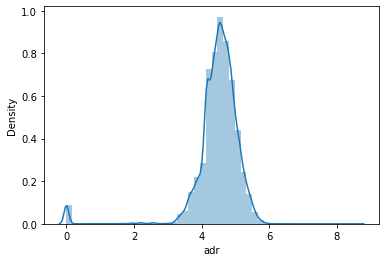

In [96]:
sns.distplot(dataframe['adr'].dropna())

In [97]:
## ANOVA

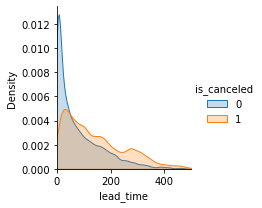

In [98]:
sns.FacetGrid(data, hue = 'is_canceled', xlim = (0, 500)).map(sns.kdeplot, 'lead_time', shade = True).add_legend()

In [99]:
## correlation

In [100]:
corr = dataframe.corr()
corr

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,reservation_status,...,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_family,total_customers,total_nights,deposit_given
hotel,1.000000,0.051197,0.061782,-0.040609,0.102592,0.182266,0.198171,0.280884,-0.008378,0.137082,...,-0.004467,-0.076598,0.072725,0.154041,-0.218961,-0.043478,-0.058094,-0.038762,-0.249747,0.172415
arrival_date_month,0.051197,1.000000,-0.010208,-0.052405,0.047902,0.077075,-0.038801,0.015456,-0.029636,0.069886,...,-0.021971,-0.011049,0.029164,0.228179,-0.021910,0.002763,0.020491,0.079090,0.045648,0.057361
meal,0.061782,-0.010208,1.000000,0.022476,-0.026007,-0.025486,0.010035,0.013913,0.105767,0.050584,...,0.011109,-0.027189,-0.031562,-0.019908,0.003455,0.006875,0.001466,-0.003447,-0.055689,0.047597
country,-0.040609,-0.052405,0.022476,1.000000,0.078982,-0.129774,0.153177,0.125415,-0.029320,0.357232,...,0.091795,-0.061513,0.067054,-0.160520,0.007613,-0.200822,-0.044139,-0.117351,-0.160759,0.395685
market_segment,0.102592,0.047902,-0.026007,0.078982,1.000000,0.540116,0.182813,0.209272,-0.265606,0.267006,...,-0.117519,-0.057578,0.096385,-0.004009,-0.145726,-0.155463,-0.104584,-0.023874,-0.004546,0.397229
distribution_channel,0.182266,0.077075,-0.025486,-0.129774,0.540116,1.000000,0.070381,0.118970,-0.023234,0.177167,...,-0.142650,-0.118461,0.048001,0.126516,-0.146562,0.075047,-0.026278,0.087776,0.084999,0.115160
reserved_room_type,0.198171,-0.038801,0.010035,0.153177,0.182813,0.070381,1.000000,0.722724,-0.143390,0.072769,...,0.022533,-0.040134,0.068336,-0.185932,-0.093401,-0.161406,-0.133748,-0.246347,-0.188866,0.201923
assigned_room_type,0.280884,0.015456,0.013913,0.125415,0.209272,0.118970,0.722724,1.000000,-0.084025,0.201570,...,-0.003205,-0.096277,0.067129,-0.038347,-0.131035,-0.135337,-0.179356,-0.229081,-0.103571,0.263383
customer_type,-0.008378,-0.029636,0.105767,-0.029320,-0.265606,-0.023234,-0.143390,-0.084025,1.000000,0.136617,...,0.024716,-0.095486,-0.101833,0.117592,0.061786,0.137114,0.106618,0.124318,0.037720,0.121789
reservation_status,0.137082,0.069886,0.050584,0.357232,0.267006,0.177167,0.072769,0.201570,0.136617,1.000000,...,-0.057365,-0.144832,0.054301,0.081660,-0.195701,-0.234877,-0.013226,0.044826,0.018554,0.481507


In [101]:
corr['is_canceled'].sort_values(ascending = False)

reservation_status                1.000000
is_canceled                       1.000000
reservation_status_date           0.488307
deposit_given                     0.481507
country                           0.357232
lead_time                         0.320075
market_segment                    0.267006
assigned_room_type                0.201570
distribution_channel              0.177167
hotel                             0.137082
customer_type                     0.136617
previous_cancellations            0.110139
adr                               0.081660
reserved_room_type                0.072769
arrival_date_month                0.069886
days_in_waiting_list              0.054301
meal                              0.050584
total_customers                   0.044826
stays_in_week_nights              0.025542
total_nights                      0.018554
arrival_date_year                 0.016622
arrival_date_week_number          0.008315
stays_in_weekend_nights          -0.001323
arrival_dat

In [102]:
corr['is_canceled'].sort_values(ascending = False).index

Index(['reservation_status', 'is_canceled', 'reservation_status_date',
       'deposit_given', 'country', 'lead_time', 'market_segment',
       'assigned_room_type', 'distribution_channel', 'hotel', 'customer_type',
       'previous_cancellations', 'adr', 'reserved_room_type',
       'arrival_date_month', 'days_in_waiting_list', 'meal', 'total_customers',
       'stays_in_week_nights', 'total_nights', 'arrival_date_year',
       'arrival_date_week_number', 'stays_in_weekend_nights',
       'arrival_date_day_of_month', 'is_family',
       'previous_bookings_not_canceled', 'is_repeated_guest',
       'booking_changes', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')

In [103]:
features_to_drop = ['reservation_status', 'reservation_status_date', 'arrival_date_year', 
                    'arrival_date_week_number', 'stays_in_weekend_nights', 'arrival_date_day_of_month']

In [104]:
dataframe.drop(features_to_drop, axis = 1, inplace = True)

In [105]:
dataframe.shape

(119210, 24)

In [106]:
## feeature importance

In [107]:
dataframe.isnull().sum()

hotel                             0
arrival_date_month                0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
reserved_room_type                0
assigned_room_type                0
customer_type                     0
is_canceled                       0
lead_time                         0
stays_in_week_nights              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
days_in_waiting_list              0
adr                               1
required_car_parking_spaces       0
total_of_special_requests         0
is_family                         0
total_customers                   0
total_nights                      0
deposit_given                     0
dtype: int64

In [108]:
dataframe.dropna(inplace = True)

In [109]:
# independent x
x = dataframe.drop('is_canceled', axis = 1)

In [110]:
# dependent or target y
y = dataframe['is_canceled']

In [111]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [112]:
feature_sel_model = SelectFromModel(Lasso(alpha = 0.005))

In [113]:
feature_sel_model.fit(x,y)

SelectFromModel(estimator=Lasso(alpha=0.005))

In [114]:
# True - feature is selected
# False - feature is not selected

feature_sel_model.get_support()

array([False, False, False,  True, False, False, False, False, False,
        True, False, False,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True])

In [115]:
cols = x.columns
cols

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'customer_type', 'lead_time', 'stays_in_week_nights',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'is_family', 'total_customers',
       'total_nights', 'deposit_given'],
      dtype='object')

In [116]:
# all selected features

selected_feature = cols[feature_sel_model.get_support()]
selected_feature

Index(['country', 'lead_time', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'total_customers', 'total_nights',
       'deposit_given'],
      dtype='object')

In [117]:
x = x[selected_feature]

In [118]:
y

0         0
1         0
2         1
3         0
4         1
         ..
119205    0
119206    0
119207    0
119208    0
119209    0
Name: is_canceled, Length: 119209, dtype: int64

In [119]:
## building ML model

In [120]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [121]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

In [122]:
X_train.shape

(89406, 12)

In [123]:
logreg = LogisticRegression()

In [124]:
logreg.fit(X_train, y_train)

LogisticRegression()

In [125]:
pred = logreg.predict(X_test)
pred

array([1, 0, 0, ..., 0, 1, 1], dtype=int64)

In [126]:
confusion_matrix(y_test, pred)

array([[17439,  1374],
       [ 4556,  6434]], dtype=int64)

In [127]:
accuracy_score(y_test, pred)

0.8010267422742677

In [128]:
## cross-validation

In [129]:
from sklearn.model_selection import cross_val_score

In [130]:
score = cross_val_score(logreg, x, y, cv = 10)
score

array([0.77862595, 0.78424629, 0.78240081, 0.81293516, 0.81520007,
       0.74070967, 0.74104521, 0.8557168 , 0.83633923, 0.80394295])

In [131]:
score.mean()

0.7951162146040854

In [132]:
## ML algorithms

In [133]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [134]:
models = []

models.append(('LogisticRegression', LogisticRegression()))
models.append(('Naive bayes', GaussianNB()))
models.append(('Random Forest', RandomForestClassifier()))
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier()))

In [135]:
for name, model in models:
    print(name)
    model.fit(X_train, y_train)
    
    predictions = model.predict(X_test)
    
    from sklearn.metrics import confusion_matrix
    print(confusion_matrix(predictions, y_test))
    print('\n')
    print(accuracy_score(predictions, y_test))
    print('\n')

LogisticRegression
[[17439  4556]
 [ 1374  6434]]


0.8010267422742677


Naive bayes
[[ 6531   675]
 [12282 10315]]


0.5652451095527296


Random Forest
[[17232  2732]
 [ 1581  8258]]


0.8552830251988055


Decision Tree
[[15988  2569]
 [ 2825  8421]]


0.8190115089084992


KNN
[[16785  3373]
 [ 2028  7617]]


0.8187766332248432


